# Example: Comparing Primary Flux Models

This file demonstrates how to use MUTE to do a simple calculation of true vertical intensities with four different primary flux models and plot their ratios.

## Import Packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import mute.constants as mtc
import mute.underground as mtu

## Set the Constants

In [2]:
mtc.set_verbose(2)
mtc.set_output(True)
mtc.set_lab("Example")
mtc.set_overburden("flat")
mtc.set_vertical_depth(1)
mtc.set_medium("rock")
mtc.set_density(2.65)
mtc.set_n_muon(100000)

## Calculate the True Vertical Intensities

The primary cosmic ray flux model can be set with the ``primary_model`` parameter. The desired slant depths can be specified in a list or array with the ``depths`` argument. Leaving this argument out will calculate the intensities for the default slant depths given by ``mtc.slant_depths``, which provides depths between 0.5 km.w.e. and 14 km.w.e. in steps of 0.5 km.w.e. (if the vertical depth is not globally set).

At each call of ``mtu.calc_u_intensities()``, the output files for the surface flux, underground flux, and underground intensities will be overwritten. There are two options to avoid this: either a ``file_name`` argument can be passed to each function to override the default output file name, or the lab can be set between calls using, for example, ``mtc.set_lab("Example_GSF")``, then ``mtc.set_lab("Example_HG")``. To stop output files from being written for a certain call, the ``output`` parameter can be set to ``False``. To stop all output files from being written, the output can be set globally with ``mtc.set_output(False)``. Because ``verbose`` has been set to ``2``, MUTE will print out information about what it is doing every step along the way.

In [3]:
intensities_GSF = mtu.calc_u_intensities(method = "tr", primary_model = "GSF") # GlobalSplitFitBeta
intensities_HG  = mtu.calc_u_intensities(method = "tr", primary_model = "HG")  # HillasGaisser2012
intensities_GH  = mtu.calc_u_intensities(method = "tr", primary_model = "GH")  # GaisserHonda
intensities_ZS  = mtu.calc_u_intensities(method = "tr", primary_model = "ZS")  # ZatsepinSokolskaya

Calculating underground fluxes.
Loading surface fluxes for USStd using GSF and SIBYLL-2.3c.
Loaded surface fluxes.
Loading survival probabilities from /home/wwoodley/Documents/git/mute/mute/data/survival_probabilities/rock_2.65_100000_Survival_Probabilities.txt.
Loaded survival probabilities.
Finished calculating underground fluxes.
Calculating true vertical underground intensities.
Finished calculating true vertical underground intensities.
True vertical underground intensities written to /home/wwoodley/Documents/git/mute/mute/data/underground/Example_Underground_Intensities_tr.txt.
Calculating underground fluxes.
Loading surface fluxes for USStd using HG and SIBYLL-2.3c.
Loaded surface fluxes.
Survival probabilities already loaded for rock with density 2.65 gcm^-3 and 100000 muons.
Finished calculating underground fluxes.
Calculating true vertical underground intensities.
Finished calculating true vertical underground intensities.
True vertical underground intensities written to /hom

## Plot the Results

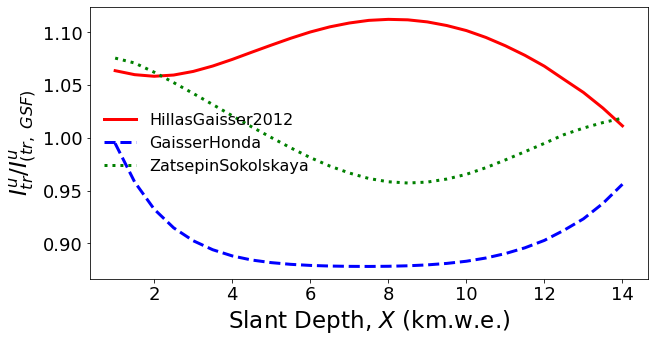

In [5]:
fig = plt.figure(figsize = (10, 5))
ax  = fig.add_subplot(111)

ax.plot(mtc.slant_depths, intensities_HG/intensities_GSF, color = "red", lw = 3, ls = "-", label = "HillasGaisser2012")
ax.plot(mtc.slant_depths, intensities_GH/intensities_GSF, color = "blue", lw = 3, ls = "--", label = "GaisserHonda")
ax.plot(mtc.slant_depths, intensities_ZS/intensities_GSF, color = "green", lw = 3, ls = ":", label = "ZatsepinSokolskaya")

ax.set_xlabel("Slant Depth, $X$ (km.w.e.)", fontsize = 23)
ax.set_ylabel(r"$I^u_{tr}/I^u_{(tr,\ GSF)}$", fontsize = 23)
ax.tick_params(axis = "both", which = "major", labelsize = 18)

plt.legend(frameon = False, fontsize = 16)

plt.show()